In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn.functional as F
from ogb.nodeproppred import DglNodePropPredDataset
import torch_geometric.transforms as T
from torch_geometric.data import DataLoader
from torch_geometric.nn import SAGEConv

Using backend: pytorch


In [2]:
dataset = DglNodePropPredDataset(name='ogbn-arxiv', 
                                 root='../../data/dataset_dgl/')

In [3]:
graph = dataset[0][0]

In [4]:
graph.out_degrees()

tensor([ 2,  1,  9,  ..., 17, 17,  2])

In [5]:
n_quotes = graph.out_degrees()
n_quoted = graph.in_degrees()
n_total_quotes = n_quotes + n_quoted

In [6]:
df = pd.DataFrame({
    'year' : graph.ndata['year'][:, 0],
    'n_quoted' : n_quoted,
    'n_quotes' : n_quotes,
    'n_total_quotes' : n_total_quotes
})

In [7]:
df.head()

,year,n_quoted,n_quotes,n_total_quotes
0,2013,289,2,291
1,2015,1,1,2
2,2014,5,9,14
3,2014,2,0,2
4,2014,5,1,6


## Distribution over time

<AxesSubplot:xlabel='year'>

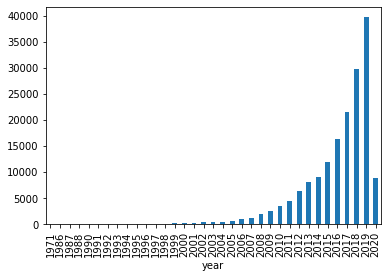

In [8]:
df.groupby('year')['n_quoted'].count().plot(kind='bar')

## Cited by number

In [9]:
col = 'n_quoted'

In [10]:
df[col].describe()

count    169343.000000
mean          6.886869
std          67.599321
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max       13155.000000
Name: n_quoted, dtype: float64

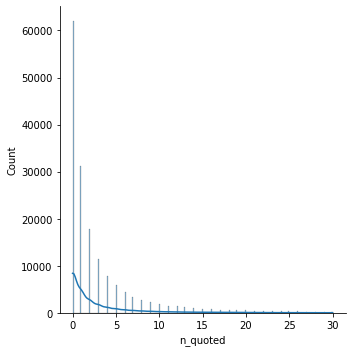

In [11]:
xmax = 30
mask = df[col] <= xmax
sns.displot(df.loc[mask, col], kde=True)

(0.0, 30.0)

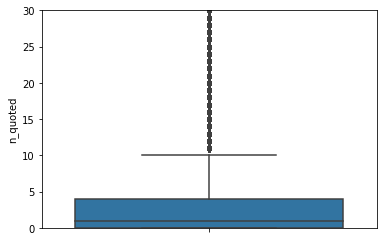

In [12]:
sns.boxplot(data=df, y=col, orient='v')
plt.ylim(0, xmax)

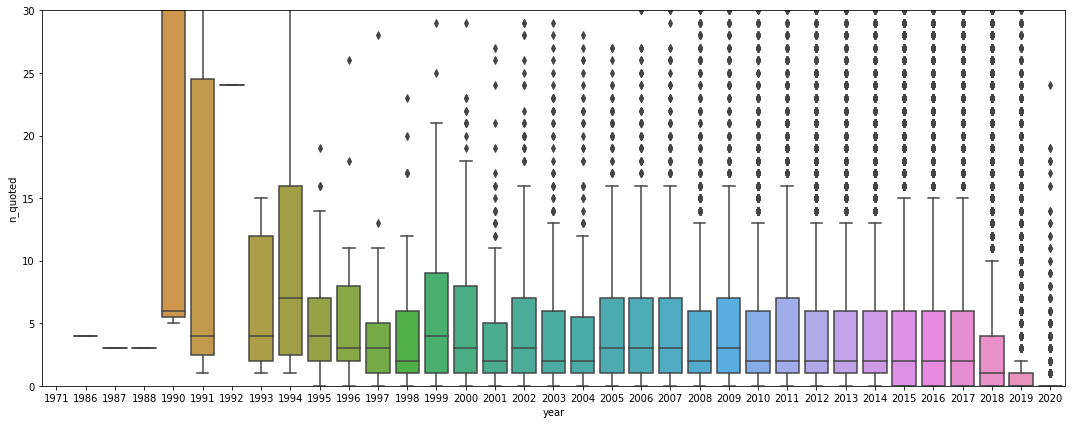

In [13]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='year', y=col, orient='v')
plt.ylim(0, xmax)
plt.tight_layout()

## Cites number

In [14]:
col = 'n_quotes'

In [15]:
df[col].describe()

count    169343.000000
mean          6.886869
std           8.879428
min           0.000000
25%           1.000000
50%           4.000000
75%           9.000000
max         436.000000
Name: n_quotes, dtype: float64

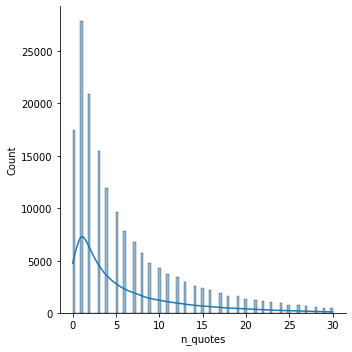

In [16]:
xmax = 30
mask = df[col] <= xmax
sns.displot(df.loc[mask, col], kde=True)

(0.0, 30.0)

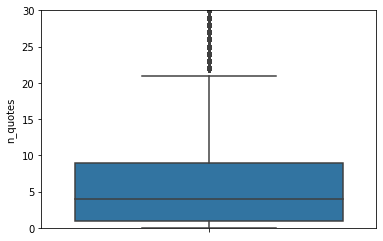

In [17]:
sns.boxplot(data=df, y=col, orient='v')
plt.ylim(0, xmax)

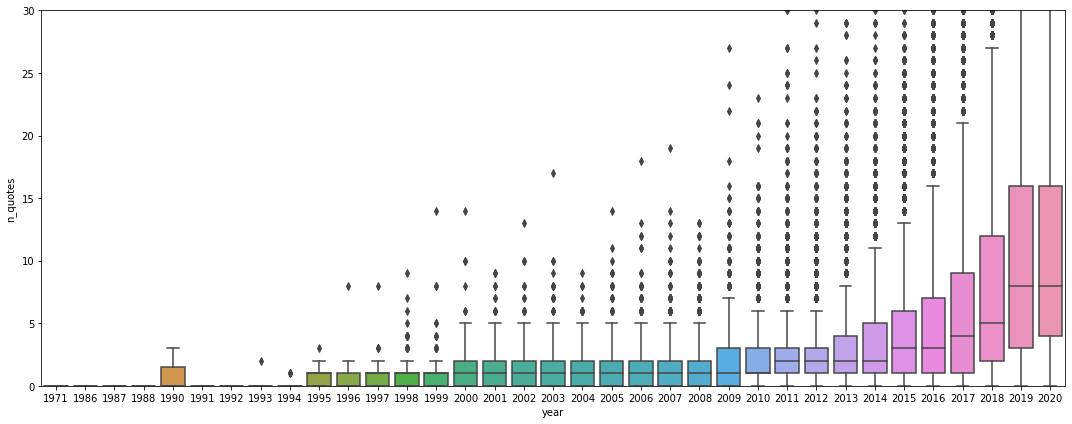

In [18]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='year', y=col, orient='v')
plt.ylim(0, xmax)
plt.tight_layout()

## Distribution over simmetric matrix

In [19]:
df[df['n_quoted'] + df['n_quotes'] != df['n_total_quotes']].shape

(0, 4)

In [20]:
col = 'n_total_quotes'

In [21]:
df[col].describe()

count    169343.000000
mean         13.773737
std          68.697671
min           1.000000
25%           3.000000
50%           6.000000
75%          14.000000
max       13161.000000
Name: n_total_quotes, dtype: float64

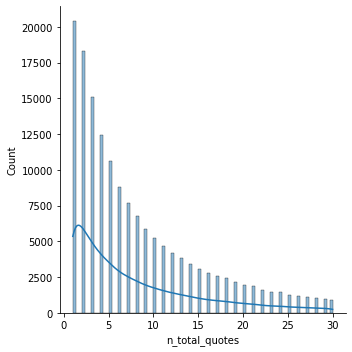

In [22]:
xmax = 30
mask = df[col] <= xmax
sns.displot(df.loc[mask, col], kde=True)

(0.0, 30.0)

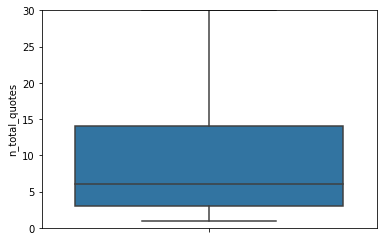

In [23]:
sns.boxplot(data=df, y=col, orient='v')
plt.ylim(0, xmax)

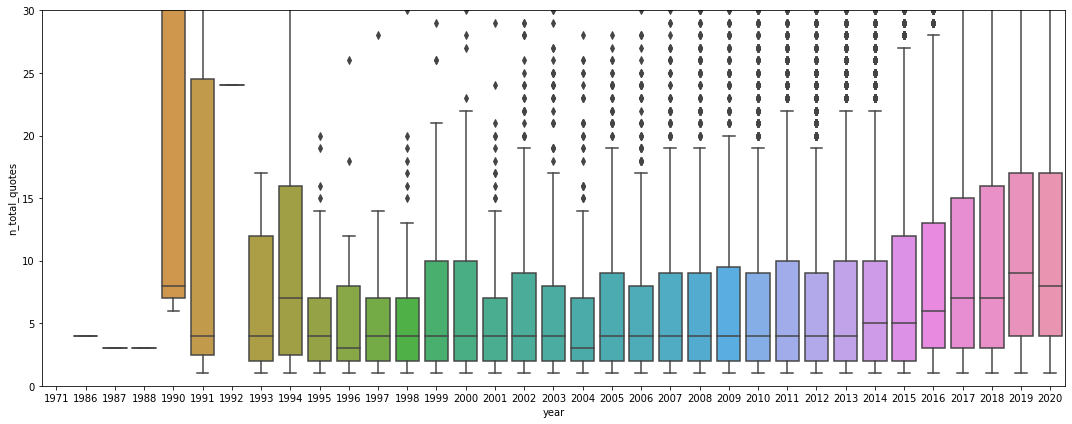

In [24]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='year', y=col, orient='v')
plt.ylim(0, xmax)
plt.tight_layout()

## Percentage of same class citations

In [25]:
y = dataset[0][1][:, 0]
y

tensor([ 4,  5, 28,  ..., 10,  4,  1])

In [26]:
graph.edges()

(tensor([104447,  15858, 107156,  ...,  45118,  45118,  45118]),
 tensor([ 13091,  47283,  69161,  ..., 162473, 162537,  72717]))

In [27]:
h_classes = torch.tensor([y[val] for val in graph.edges()[0]])
t_classes = torch.tensor([y[val] for val in graph.edges()[1]])

In [28]:
(h_classes == t_classes).sum() / t_classes.shape[0]

tensor(0.6551)